# Clean and Explore Humidity and Temperature Sensor Data
Data Set: 
Data Summary
No. Years: {2013, 2014, 2015, 2016}

In [92]:
import pandas as pd
import datetime
import string
from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure

import numpy as np
import matplotlib.pyplot as plt


## important: install the sample data that comes with Bokeh https://bokeh.pydata.org/en/0.10.0/docs/installation.html

## Prepare Home Observations

In [93]:
# Read column headings
with open ('/Users/stewarta/repos/iot-htsensor/data/columns.txt') as f:
    cols = f.readlines()
cols = [ln.strip() for ln in cols] 

# read data from file: parse the date after reading, just as a sanity check
df = pd.read_csv('/Users/stewarta/Documents/DATA/htsensor/raw.data', sep = ';',decimal=',', names=cols)

# filter irrelevant columns
df = df[['timestamp','Temp1', 'Temp2', 'Temp3', 'Temp4','Temp8','Humi1', 'Humi2', 'Humi3', 'Humi4']]

# set index
df.insert(1, 'datetime', pd.to_datetime(df.timestamp, errors='coerce')) # If ‘coerce’, then invalid parsing will be set as NaT
df.set_index('datetime', inplace=True)

# resample
df = df[['Temp1', 'Temp2', 'Temp3', 'Temp4', 
         'Humi1', 'Humi2', 'Humi3', 'Humi4']].resample('D').min()

In [120]:
#Infer target season 
#German Seasons
#SeasonID; Season Name; Month
#2; Spring; March, April, May
#3; Summer; June, July, August
#4; Autumn; September, October, November
#1; Winter; December, January, February
#spring = range(3, 5)
#summer = range(6, 8)
#fall = range(9, 11)
def season(month):
    if month not in range(1,12):
        return np.NaN
        #raise Exception('month must be integer value in interval [1...12] inclusive. The value of x was: {}'.format(month))
    return (month%12 + 3)//3

In [121]:
df['month'] = df.index.month
df.head()

,Temp1,Temp2,Temp3,Temp4,Humi1,Humi2,Humi3,Humi4,month,season
datetime,,,,,,,,,,
2013-04-14 07:00:00,10.229167,19.600000,22.975000,20.200000,76.000000,42.000000,34.000000,40.000000,4,2.0
2013-04-14 08:00:00,11.390196,19.590196,23.028431,20.199020,75.460784,42.401961,34.392157,40.725490,4,2.0
2013-04-14 09:00:00,13.222772,19.518812,23.630693,20.179208,73.851485,43.000000,34.138614,41.000000,4,2.0
2013-04-14 10:00:00,14.580198,19.624752,23.916832,20.383168,73.049505,43.653465,34.415842,41.881188,4,2.0
2013-04-14 11:00:00,16.541748,19.560194,24.039806,20.441748,72.087379,45.203883,35.436893,42.970874,4,2.0


In [122]:
df['season'] = df.index.to_series().apply(lambda m : season(m.month))
df.head()

,Temp1,Temp2,Temp3,Temp4,Humi1,Humi2,Humi3,Humi4,month,season
datetime,,,,,,,,,,
2013-04-14 07:00:00,10.229167,19.600000,22.975000,20.200000,76.000000,42.000000,34.000000,40.000000,4,2
2013-04-14 08:00:00,11.390196,19.590196,23.028431,20.199020,75.460784,42.401961,34.392157,40.725490,4,2
2013-04-14 09:00:00,13.222772,19.518812,23.630693,20.179208,73.851485,43.000000,34.138614,41.000000,4,2
2013-04-14 10:00:00,14.580198,19.624752,23.916832,20.383168,73.049505,43.653465,34.415842,41.881188,4,2
2013-04-14 11:00:00,16.541748,19.560194,24.039806,20.441748,72.087379,45.203883,35.436893,42.970874,4,2


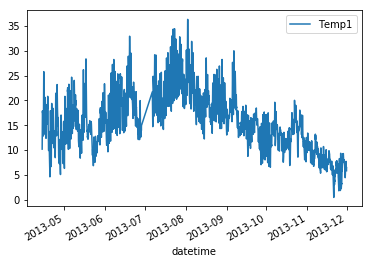

In [124]:
# lets have a look at the data. LOOKS like we should smooth the input 
condition = df.index.year == 2013
df[condition][['Temp1']].plot()

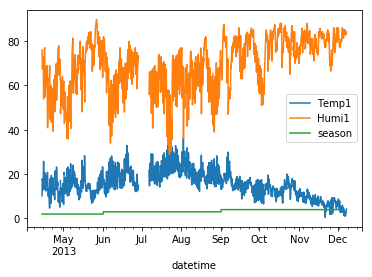

In [100]:

df[condition][['Temp1', 'Humi1', 'season']].plot()


In [106]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

#series = read_csv('/Users/stewarta/repos/iot-htsensor/arima/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series = df[condition][['Temp1']


SyntaxError: invalid syntax (<ipython-input-106-eba2b573a944>, line 17)

In [117]:
df.dropna(axis=0, inplace=True)
condition = (df.index.year == 2013) & (df.index.month == 4)
series = df[condition][['Temp1']].values
series

array([[10.22916667],
       [11.39019608],
       [13.22277228],
       [14.58019802],
       [16.54174757],
       [17.9039604 ],
       [17.225     ],
       [17.456     ],
       [17.55544554],
       [17.643     ],
       [17.19405941],
       [16.41372549],
       [15.69117647],
       [15.31862745],
       [15.093     ],
       [14.74509804],
       [14.467     ],
       [14.27227723],
       [14.01262136],
       [13.58137255],
       [13.16930693],
       [12.8592233 ],
       [13.20196078],
       [14.428125  ],
       [16.58446602],
       [18.84660194],
       [21.38932039],
       [22.73465347],
       [24.52277228],
       [25.79230769],
       [24.154     ],
       [22.13883495],
       [20.982     ],
       [19.47676768],
       [18.27058824],
       [17.023     ],
       [15.80594059],
       [15.6223301 ],
       [15.33762376],
       [14.90990099],
       [14.38      ],
       [13.93883495],
       [13.63627451],
       [13.6245098 ],
       [13.47087379],
       [13

predicted=13.132611, expected=12.894175
predicted=12.555280, expected=13.065347
predicted=13.274344, expected=14.515686
predicted=15.799382, expected=15.539216
predicted=16.381267, expected=16.264706
predicted=16.962711, expected=17.050000
predicted=17.584203, expected=18.550485
predicted=19.654517, expected=20.573786
predicted=22.158843, expected=21.279000
predicted=21.699078, expected=22.691089
predicted=23.866081, expected=23.196040
predicted=23.252794, expected=22.138235
predicted=21.099065, expected=21.015842
predicted=19.964704, expected=20.367327
predicted=19.632153, expected=19.851456
predicted=19.449772, expected=19.230000
predicted=18.895095, expected=18.543564
predicted=18.120351, expected=18.248544
predicted=18.114356, expected=18.079612
predicted=18.007080, expected=17.600990
predicted=17.302565, expected=17.037624
predicted=16.669711, expected=16.472549
predicted=16.029611, expected=15.835644
predicted=15.348013, expected=15.115686
predicted=14.594483, expected=15.072727


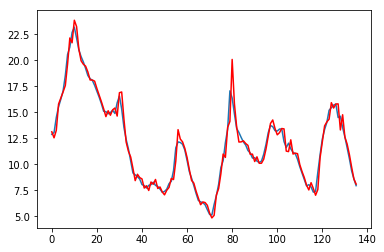

In [118]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
#series = read_csv('/Users/stewarta/repos/iot-htsensor/arima/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
condition = (df.index.year == 2013) & (df.index.month == 4)
series = df[condition][['Temp1']]

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


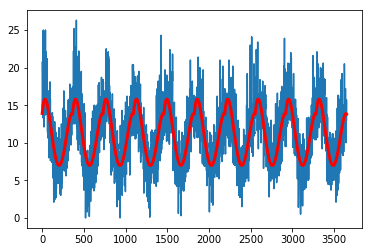

In [119]:
# model seasonality with a polynomial model
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv('/Users/stewarta/Downloads/time_series_forecasting_with_python/code/chapter_14/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()